In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

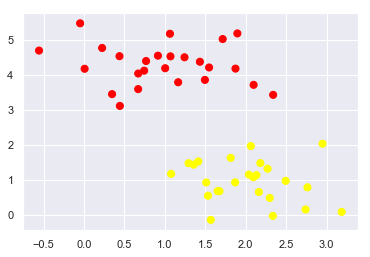

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn');

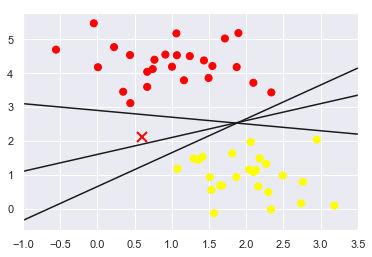

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m *xfit + b, '-k')
    
plt.xlim(-1,3.5);

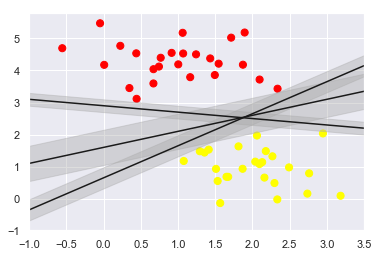

In [4]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m * xfit + b 
    plt.plot(xfit,yfit, '-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
    
plt.xlim(-1,3.5);

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
def plot_scv_decision_function(model,ax=None, plot_support=True):
    """creating scatter of decision function 2 dimensions SVC"""
    
    if ax is None:
        ax = plt.gca()
        
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

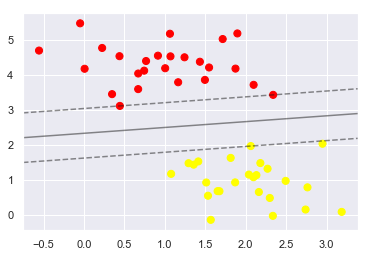

In [8]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_scv_decision_function(model);

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [10]:
def plot_svm(N=10, ax='None'):
    X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)
    X=X[:N]
    y=y[:N]
    model = SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_scv_decision_function(model,ax)

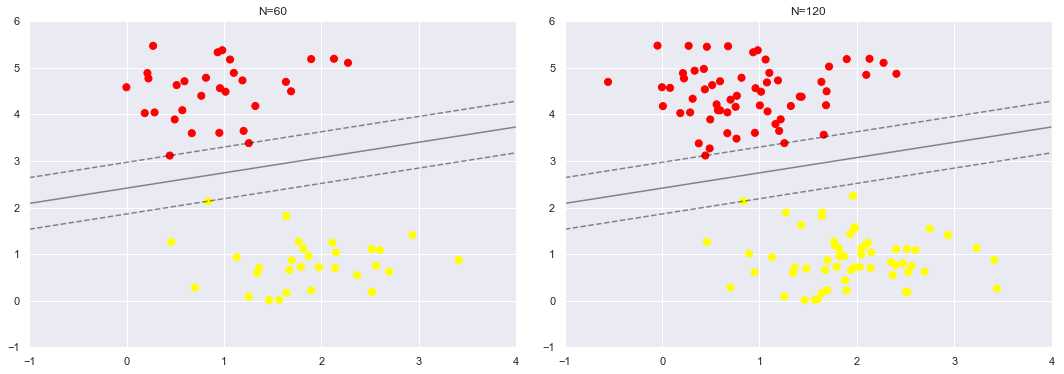

In [11]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

In [12]:
from ipywidgets import interact,fixed
interact(plot_svm,N=np.arange(10,200,10),ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 13…

In [13]:
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles (100,factor=.1,noise=.1)

In [14]:
clf = SVC(kernel='linear').fit(X,y)

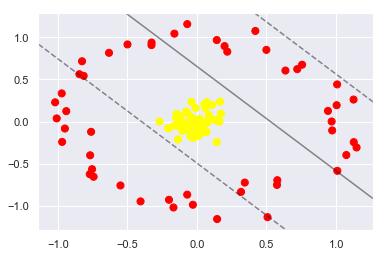

In [15]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_scv_decision_function(clf,plot_support=False);

In [16]:
r = np.exp(-(X ** 2).sum(1))

In [17]:
from mpl_toolkits import mplot3d

In [18]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go

In [22]:
nice3d = go.scatter3d(x=X[:,0],y=X[:,1],z=r,mode='markers',
                      marker=dict(size=2,color='black',colorscale='Viridis',opacity=0.6))
data = [nice3d]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ))

TypeError: 'module' object is not callable

In [21]:
trace1 = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=r,
    mode='markers',
    marker=dict(
        size=12,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.